In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#Import the Dataset
df= pd.read_csv("Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [6]:
# Check NAN values
df.isna().sum()

,0
Unnamed: 0,0
Email Text,16
Email Type,0


In [7]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [8]:
#dataset shape
df.shape

(18634, 3)

In [9]:
# Count the occurrences of each E-mail type.
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


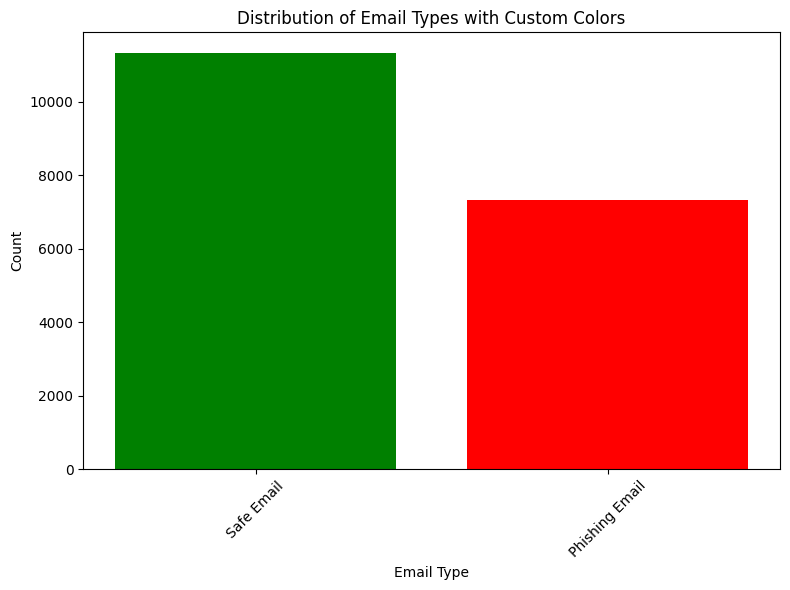

In [10]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


In [11]:
# We will use undersapling technique
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [12]:
# lets check the sahpe again
Safe_Email.shape,Phishing_Email.shape

((7312, 3), (7312, 3))

In [13]:
# lest create a new Data with the balanced E-mail types
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()

,Unnamed: 0,Email Text,Email Type
0,3005,"On Wed, 25 Sep 2002, Joseph S. Barrera III wro...",Safe Email
1,17484,"URL: http://www.newsisfree.com/click/-0,861366...",Safe Email
2,15889,caiso notification : operations procedure t - ...,Safe Email
3,17260,re : question on office space in the new build...,Safe Email
4,2716,\nIf the frequency of my laptop's disk chirps ...,Safe Email


In [14]:
# split the data into a metrix of features X and Dependent Variable y
X = Data["Email Text"].values
y = Data["Email Type"].values

In [15]:
# lets splitting Our Data
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
# Importing Libraries for the model ,Tfidf and Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=10))])# add another hyperparamters as U want

In [17]:
# Trian Our model
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_estimators=10))])

In [18]:
# Prediction
y_pred = classifier.predict(x_test)

In [19]:
# Importing classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [20]:
#accuracy_score
accuracy_score(y_test,y_pred)

0.9339106654512306

In [21]:
#confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2112,   86],
       [ 204, 1986]])

In [22]:
#classification_report
classification_report(y_test,y_pred)

'                precision    recall  f1-score   support\n\nPhishing Email       0.91      0.96      0.94      2198\n    Safe Email       0.96      0.91      0.93      2190\n\n      accuracy                           0.93      4388\n     macro avg       0.94      0.93      0.93      4388\n  weighted avg       0.94      0.93      0.93      4388\n'

In [34]:
# This function is for Checking the type of Email (Safe or Phishing)!
def predict_email_type(email_text):
    prediction = classifier.predict([email_text])[0]
    probabilities = classifier.predict_proba([email_text])[0]
    phishing_prob = probabilities[0] * 100  # Probability of 'Phishing Email'
    safe_prob = probabilities[1] * 100      # Probability of 'Safe Email'

    if prediction == 'Phishing Email':
        print(f"The email is classified as: {prediction} with {phishing_prob:.2f}% confidence.")
    else:
        print(f"The email is classified as: {prediction} with {safe_prob:.2f}% confidence.")
    return prediction

In [45]:
# Example usage of the function
email_text = input("Enter Email Text to Check if it's Safe or Not ---->   ")
result = predict_email_type(email_text)

Enter Email Text to Check if it's Safe or Not ---->   Welcome Subscriber; Your Annual membership for NORTON 360 TOTAL PROTECTION has been renewed and updated successfully. The amount charged will be reflected within the next 24 to 48 hrs on your profile of account. Product Information: INVOICE NO. @ GGH1644259106OV ITEM NAME @ NORTON 360 TOTAL PROTECTION START DATE @ 2022 Feb 07 END DATE @ 1 year from START DATE GRAND TOTAL @ $240.42 USD PAYMENT METHOD @ Debit from account If you wish to not to continue subscription and claim a REFUND then please feel free to call our Billing Department as soon as possible. You can Reach us on : +1 – ( 803 ) – ( 598 ) – 4473 Regards, Billing Department SP
The email is classified as: Phishing Email with 60.00% confidence.
